# Free floating ring fluxes with interpolated models

M Kenworthy

2019 May 28



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table
import os

Reading in the models from Michael Min.

https://mail.google.com/mail/u/0/#inbox/KtbxLxGLkpSZWPnFmxXfSStwCkQvCNXlCL


    So here are the fluxes I already computed. The files starting with ‘thick’ are for the case the rings are geometrically thick (so optically thin). The files starting with ‘thin’ have a constant opening angle of the rings of 1/200. The other files are for the case where the rings are slightly flaring (so the opening angle increases outwards). This way some more flux is captured. That was the original setup. For the thick and thin cases I did not yet do all computations, but the trend is pretty much a straight line in log-log space (so easily interpolated). I can still easily perform them as well for the paper.
    
    As you can see, the fluxes heavily depend on the vertical height of the rings.
    
    I used 0.6 AU as outer radius.

In [2]:
basedir = 'fluxes/'
models = ['output_00100micron',
'output_01000micron',
'output_10000micron',
'thick_output_00100micron',
'thick_output_01000micron',
'thick_output_10000micron',
'thin_output_00100micron',
'thin_output_01000micron',
'thin_output_10000micron']

def draw_limits(ax):
    detect = 89.
    sig = 19.
    lum = 2.e-4
    ax.axhline(y=detect, color='grey', linestyle='-')
    ax.axhline(y=sig*3, color='grey', linestyle='-')
    ax.axvline(x=lum, color='grey', linestyle='-')    

00100
100
01000
1000
10000
10000
00100
100
01000
1000
10000
10000
00100
100
01000
1000
10000
10000


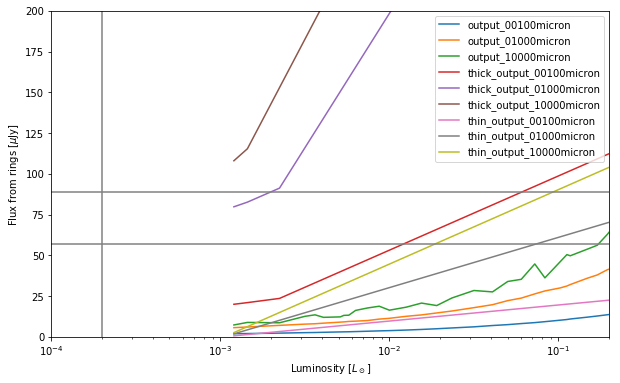

In [3]:
f = plt.figure(figsize=(10,6))

ax = f.add_subplot(111)
for f in models:
    fin = os.path.join(basedir, f)
    print(fin[-11:-6])
    size = fin[-11:-6]
    print(int(size))
    t = Table.read(fin, format='ascii')
    plt.semilogx(t['L[Lsun]'],t['Flux[Jy]']*1e6,label=f)

draw_limits(ax)
plt.xlim(0.0001,0.2)
plt.ylim(0,200)
plt.ylabel('Flux from rings [$\mu$Jy]')
plt.xlabel('Luminosity [$L_\odot$]')
plt.legend()

In [4]:
models2 = ['output_00100micron_1.0600E+01AU',
'output_00100micron_1.6000E+01AU',
'output_00100micron_5.3000E+00AU',
'output_01000micron_1.0600E+01AU',
'output_01000micron_1.6000E+01AU',
'output_01000micron_5.3000E+00AU',
'output_10000micron_1.0600E+01AU',
'output_10000micron_1.6000E+01AU',
'output_10000micron_5.3000E+00AU',
'thick_output_00100micron_1.0600E+01AU',
'thick_output_00100micron_1.6000E+01AU',
'thick_output_00100micron_5.3000E+00AU',
'thick_output_01000micron_1.0600E+01AU',
'thick_output_01000micron_1.6000E+01AU',
'thick_output_01000micron_5.3000E+00AU',
'thick_output_10000micron_1.0600E+01AU',
'thick_output_10000micron_1.6000E+01AU',
'thick_output_10000micron_5.3000E+00AU',
'thin_output_00100micron_1.0600E+01AU',
'thin_output_00100micron_1.6000E+01AU',
'thin_output_00100micron_5.3000E+00AU',
'thin_output_01000micron_1.0600E+01AU',
'thin_output_01000micron_1.6000E+01AU',
'thin_output_01000micron_5.3000E+00AU',
'thin_output_10000micron_1.0600E+01AU',
'thin_output_10000micron_1.6000E+01AU',
'thin_output_10000micron_5.3000E+00AU']

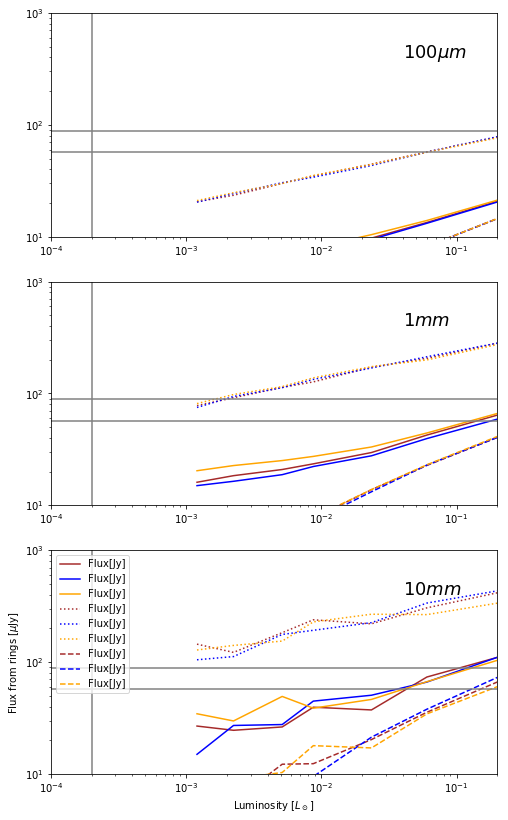

In [5]:
f = plt.figure(figsize=(8,14))
basedir='bound/'

ax1 = f.add_subplot(311)
plt.xlim(0.0001,0.2)
plt.ylim(10,1000)

ax2 = f.add_subplot(312,sharex=ax1,sharey=ax1)
ax3 = f.add_subplot(313,sharex=ax1,sharey=ax1)

for fi in models2:
    fin = os.path.join(basedir, fi)
    
    # filter curves
    line='solid'
    lab = 'solid'
    
    if "thick" in fin:
        line='dotted'
    if "thin" in fin:
        line='dashed'
    
    col='black'
    # colour line with semimajor axis
    if "5.3000E+00" in fin:
        col='orange'
    
    if "1.0600E+01" in fin:
        col='brown'
        
    if "1.6000E+01" in fin:
        col='blue'

    t = Table.read(fin, format='ascii')
    if "100micron" in fin:
        ax1.loglog(t['L[Lsun]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
    if "1000micron" in fin:
        ax2.loglog(t['L[Lsun]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
    if "10000micron" in fin:
        ax3.loglog(t['L[Lsun]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
draw_limits(ax1)
draw_limits(ax2)
draw_limits(ax3)

ax1.text(0.04, 400, "$100\mu m$", fontsize=18)
ax2.text(0.04, 400, "$1 mm$", fontsize=18)
ax3.text(0.04, 400, "$10 mm$", fontsize=18)

plt.ylabel('Flux from rings [$\mu$Jy]')
plt.xlabel('Luminosity [$L_\odot$]')
plt.legend()

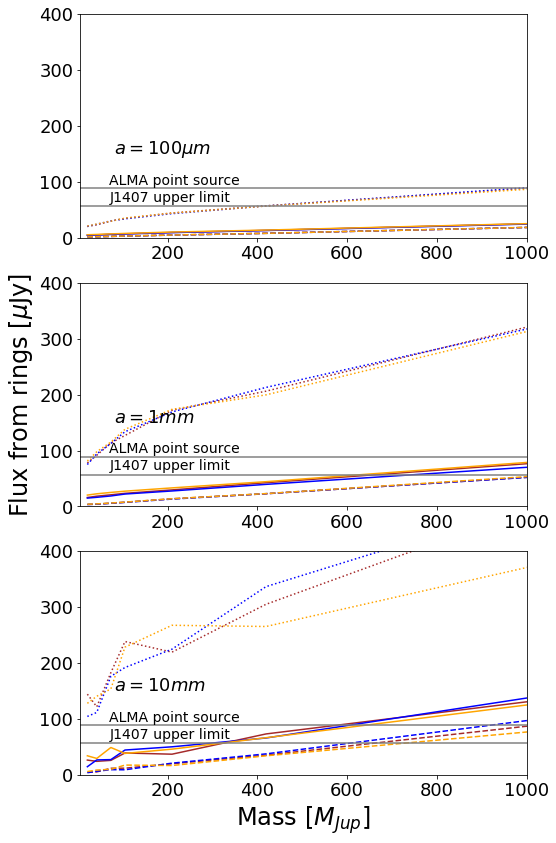

In [6]:
f = plt.figure(figsize=(8,14))
basedir='bound/'

ax1 = f.add_subplot(311)
plt.xlim(5,1000)
plt.ylim(0,400)

ax2 = f.add_subplot(312,sharex=ax1,sharey=ax1)
ax3 = f.add_subplot(313,sharex=ax1,sharey=ax1)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)
ax3.tick_params(axis='both', which='major', labelsize=18)

for fi in models2:
    fin = os.path.join(basedir, fi)
    
    # filter curves
    line='solid'
    lab = 'solid'
    
    if "thick" in fin:
        line='dotted'
    if "thin" in fin:
        line='dashed'
    
    col='black'
    # colour line with semimajor axis
    if "5.3000E+00" in fin:
        col='orange'
    
    if "1.0600E+01" in fin:
        col='brown'
        
    if "1.6000E+01" in fin:
        col='blue'

    t = Table.read(fin, format='ascii')
    if "100micron" in fin:
        ax1.plot(t['M[Mjup]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
    if "1000micron" in fin:
        ax2.plot(t['M[Mjup]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
    if "10000micron" in fin:
        ax3.plot(t['M[Mjup]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
draw_limits(ax1)
draw_limits(ax2)
draw_limits(ax3)

ax1.text(80, 150, "$a=100\mu m$", fontsize=18)
ax2.text(80, 150, "$a=1 mm$", fontsize=18)
ax3.text(80, 150, "$a=10 mm$", fontsize=18)

x = 30; y = 60
for a in [ax1,ax2,ax3]:
    a.text(70,65,"J1407 upper limit",fontsize=14)
    a.text(70,95,'ALMA point source',fontsize=14)
    
ax2.set_ylabel('Flux from rings [$\mu$Jy]',fontsize=24)
ax3.set_xlabel('Mass [$M_{Jup}$]',fontsize=24)
plt.savefig('free_floating_ring_fluxes_interpolated.pdf',bbox_inches='tight')

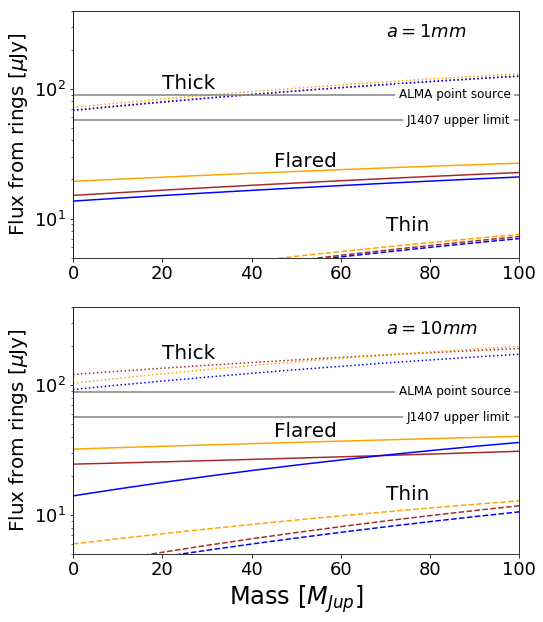

In [34]:
f = plt.figure(figsize=(8,10))
basedir='bound/'

ax1 = f.add_subplot(211)
plt.xlim(0,100)
plt.ylim(5e0,400)

ax2 = f.add_subplot(212,sharex=ax1,sharey=ax1)

ax1.tick_params(axis='both', which='major', labelsize=18)
ax2.tick_params(axis='both', which='major', labelsize=18)

for fi in models2:
    fin = os.path.join(basedir, fi)
    
    # filter curves
    line='solid'
    lab = 'solid'
    
    if "thick" in fin:
        line='dotted'
    if "thin" in fin:
        line='dashed'
    
    col='black'
    # colour line with semimajor axis
    if "5.3000E+00" in fin:
        col='orange'
    
    if "1.0600E+01" in fin:
        col='brown'
        
    if "1.6000E+01" in fin:
        col='blue'
    order = 4
    t = Table.read(fin, format='ascii')
    if "1000micron" in fin:
#        ax1.semilogy(t['M[Mjup]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
        x = t['M[Mjup]']
        y = np.log10(t['Flux[Jy]']*1e6)
        z = np.polyfit(x, y, order)
        xin = np.linspace(0,1000,100)
        p=np.poly1d(z)
        ax1.semilogy(xin,np.power(10,p(xin)),linestyle=line,color=col)

    if "10000micron" in fin:
#        ax2.semilogy(t['M[Mjup]'],t['Flux[Jy]']*1e6,linestyle=line,color=col)
        x = t['M[Mjup]']
        y = np.log10(t['Flux[Jy]']*1e6)
        z = np.polyfit(x, y, order)
        xin = np.linspace(0,1000,100)
        p=np.poly1d(z)
        ax2.semilogy(xin,np.power(10,p(xin)),linestyle=line,color=col)

draw_limits(ax1)
draw_limits(ax2)

ax1.text(70, 250, "$a=1 mm$", fontsize=18)
ax2.text(70, 250, "$a=10 mm$", fontsize=18)

x = 30; y = 60
for a in [ax1,ax2]:
    t1 = a.text(98,57,"J1407 upper limit",fontsize=12, ha='right', va='center')
    t2 = a.text(98,90,'ALMA point source',fontsize=12, ha='right', va='center')
    t1.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='none'))
    t2.set_bbox(dict(facecolor='white', alpha=0.9, edgecolor='none'))

    
ax2.set_ylabel('Flux from rings [$\mu$Jy]',fontsize=20)
ax1.set_ylabel('Flux from rings [$\mu$Jy]',fontsize=20)
ax2.set_xlabel('Mass [$M_{Jup}$]',fontsize=24)

lsiz = 20

ax1.text(20,100,"Thick", fontsize=lsiz)
ax1.text(45,25,"Flared", fontsize=lsiz)
ax1.text(70,8,"Thin", fontsize=lsiz)

ax2.text(20,160,"Thick", fontsize=lsiz)
ax2.text(45,40,"Flared", fontsize=lsiz)
ax2.text(70,13,"Thin", fontsize=lsiz)


plt.savefig('free_floating_ring_fluxes_interpolated_2_panel.pdf',bbox_inches='tight')